In [1]:
import pandas as coppds
import seaborn as snscopd
import matplotlib.pyplot as pltcopd

salivaco = coppds.read_csv('Exasens.csv')
salivaco

,Diagnosis,ID,Imaginary Part (Min Δ),Imaginary Part (Avg Δ),Real Part (Min Δ),Real Part (Avg Δ),Gender,Age,Smoking
0,COPD,301-4,-320.61,-300.563531,-495.26,-464.171991,1,77,2
1,COPD,302-3,-325.39,-314.750359,-473.73,-469.263140,0,72,2
2,COPD,303-3,-323.00,-317.436056,-476.12,-471.897667,1,73,3
3,COPD,304-4,-327.78,-317.399670,-473.73,-468.856388,1,76,2
4,COPD,305-4,-325.39,-316.155785,-478.52,-472.869783,0,65,2
...,...,...,...,...,...,...,...,...,...
394,Infected,I176,NaN,NaN,NaN,NaN,0,49,2
395,Infected,I177,NaN,NaN,NaN,NaN,0,37,1
396,Infected,I178,NaN,NaN,NaN,NaN,0,29,1
397,Infected,I179,NaN,NaN,NaN,NaN,1,51,1


In [2]:
import warnings as salwar
salwar.filterwarnings("ignore")

In [3]:
salivaco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Diagnosis               399 non-null    object 
 1   ID                      399 non-null    object 
 2   Imaginary Part (Min Δ)  100 non-null    float64
 3   Imaginary Part (Avg Δ)  100 non-null    float64
 4   Real Part (Min Δ)       100 non-null    float64
 5   Real Part (Avg Δ)       100 non-null    float64
 6   Gender                  399 non-null    int64  
 7   Age                     399 non-null    int64  
 8   Smoking                 399 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 28.2+ KB


Missing values are seen in four features related to Saliva Permittivity

In [4]:
sali_nul = salivaco.isnull().sum()
sali_nul

Diagnosis                   0
ID                          0
Imaginary Part (Min Δ)    299
Imaginary Part (Avg Δ)    299
Real Part (Min Δ)         299
Real Part (Avg Δ)         299
Gender                      0
Age                         0
Smoking                     0
dtype: int64

In [7]:
salivaco['Diagnosis'].value_counts()

Diagnosis
HC          160
Asthma       80
Infected     80
COPD         79
Name: count, dtype: int64

In [8]:
rows_sali_nul = salivaco[salivaco.isnull().any(axis=1)]
print("All 299 samples with NaN:")
rows_sali_nul

All 299 samples with NaN:


,Diagnosis,ID,Imaginary Part (Min Δ),Imaginary Part (Avg Δ),Real Part (Min Δ),Real Part (Avg Δ),Gender,Age,Smoking
7,COPD,308,NaN,NaN,NaN,NaN,1,77,2
15,COPD,316,NaN,NaN,NaN,NaN,1,45,2
16,COPD,317,NaN,NaN,NaN,NaN,1,69,2
23,COPD,324,NaN,NaN,NaN,NaN,1,64,2
29,COPD,330,NaN,NaN,NaN,NaN,1,73,1
...,...,...,...,...,...,...,...,...,...
394,Infected,I176,NaN,NaN,NaN,NaN,0,49,2
395,Infected,I177,NaN,NaN,NaN,NaN,0,37,1
396,Infected,I178,NaN,NaN,NaN,NaN,0,29,1
397,Infected,I179,NaN,NaN,NaN,NaN,1,51,1


In [9]:
rows_sali_nul['Diagnosis'].value_counts() ##---distribution of samples in 299 rows

Diagnosis
HC          120
Asthma       70
Infected     70
COPD         39
Name: count, dtype: int64

In [10]:
dupsaliva = salivaco[salivaco.duplicated()]
dupsaliva

,Diagnosis,ID,Imaginary Part (Min Δ),Imaginary Part (Avg Δ),Real Part (Min Δ),Real Part (Avg Δ),Gender,Age,Smoking


0 duplicate rows in the dataframe

In [11]:
salivaco = salivaco.dropna() ##----dropping all 299 samples with NaN in saliva permittivity
salivaco

,Diagnosis,ID,Imaginary Part (Min Δ),Imaginary Part (Avg Δ),Real Part (Min Δ),Real Part (Avg Δ),Gender,Age,Smoking
0,COPD,301-4,-320.61,-300.563531,-495.26,-464.171991,1,77,2
1,COPD,302-3,-325.39,-314.750359,-473.73,-469.263140,0,72,2
2,COPD,303-3,-323.00,-317.436056,-476.12,-471.897667,1,73,3
3,COPD,304-4,-327.78,-317.399670,-473.73,-468.856388,1,76,2
4,COPD,305-4,-325.39,-316.155785,-478.52,-472.869783,0,65,2
...,...,...,...,...,...,...,...,...,...
366,Infected,148-5,-323.00,-314.384434,-476.12,-472.103689,1,38,1
367,Infected,149-5,-323.00,-314.323628,-476.12,-472.395413,1,36,1
368,Infected,150-5,-323.00,-312.856656,-480.91,-472.294281,0,33,1
369,Infected,151-4,-327.78,-319.305447,-476.12,-471.776918,1,43,1


In [12]:
salivaco = salivaco.drop(columns=['ID'])

In [13]:
salivaco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 375
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Diagnosis               100 non-null    object 
 1   Imaginary Part (Min Δ)  100 non-null    float64
 2   Imaginary Part (Avg Δ)  100 non-null    float64
 3   Real Part (Min Δ)       100 non-null    float64
 4   Real Part (Avg Δ)       100 non-null    float64
 5   Gender                  100 non-null    int64  
 6   Age                     100 non-null    int64  
 7   Smoking                 100 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 7.0+ KB


In [14]:
salivaco

,Diagnosis,Imaginary Part (Min Δ),Imaginary Part (Avg Δ),Real Part (Min Δ),Real Part (Avg Δ),Gender,Age,Smoking
0,COPD,-320.61,-300.563531,-495.26,-464.171991,1,77,2
1,COPD,-325.39,-314.750359,-473.73,-469.263140,0,72,2
2,COPD,-323.00,-317.436056,-476.12,-471.897667,1,73,3
3,COPD,-327.78,-317.399670,-473.73,-468.856388,1,76,2
4,COPD,-325.39,-316.155785,-478.52,-472.869783,0,65,2
...,...,...,...,...,...,...,...,...
366,Infected,-323.00,-314.384434,-476.12,-472.103689,1,38,1
367,Infected,-323.00,-314.323628,-476.12,-472.395413,1,36,1
368,Infected,-323.00,-312.856656,-480.91,-472.294281,0,33,1
369,Infected,-327.78,-319.305447,-476.12,-471.776918,1,43,1


In [15]:
salivaco['Diagnosis'].value_counts()

Diagnosis
COPD        40
HC          40
Asthma      10
Infected    10
Name: count, dtype: int64

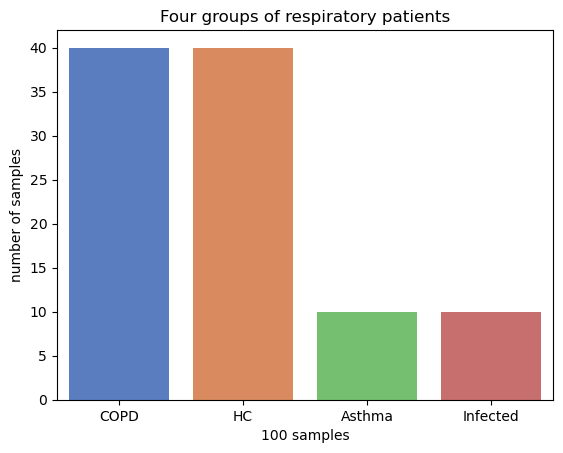

In [16]:
snscopd.countplot(data=salivaco, x='Diagnosis', palette='muted')
pltcopd.title('Four groups of respiratory patients')
pltcopd.xlabel('100 samples')
pltcopd.ylabel('number of samples')
pltcopd.show()

samples of respiratory patients who are male:
Diagnosis
COPD        32
HC          23
Infected     4
Asthma       2
Name: count, dtype: int64

samples of respiratory patients who are female:
Diagnosis
HC          17
COPD         8
Asthma       8
Infected     6
Name: count, dtype: int64

Gender distribution:
Gender
1    61
0    39
Name: count, dtype: int64


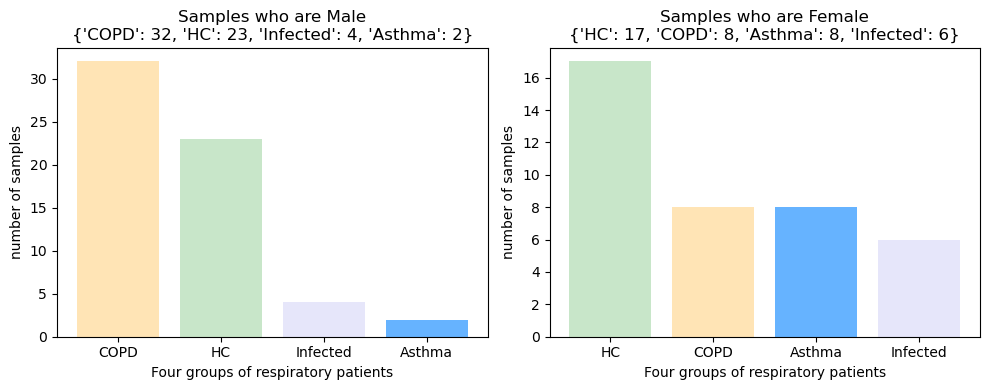

In [17]:
mal_sal = salivaco[salivaco['Gender'] == 1]  #---filtering male and female
fem_sal = salivaco[salivaco['Gender'] == 0]

mal_sal_tar = mal_sal['Diagnosis'].value_counts()  #---calculating target class
fem_sal_tar = fem_sal['Diagnosis'].value_counts()

gender_dist = salivaco['Gender'].value_counts()

print("samples of respiratory patients who are male:")
print(mal_sal_tar)
print("\nsamples of respiratory patients who are female:")
print(fem_sal_tar)
print("\nGender distribution:")
print(gender_dist)

salfig, axsal = pltcopd.subplots(1, 2, figsize=(10, 4))

#---plotting piecharts
axsal[0].bar(mal_sal_tar.index.astype(str), mal_sal_tar.values, color=['#FFE4B5', '#C8E6C9', '#E6E6FA', '#66B3FF'])
axsal[0].set_title(f'Samples who are Male\n{mal_sal_tar.to_dict()}')
axsal[0].set_xlabel('Four groups of respiratory patients')
axsal[0].set_ylabel('number of samples')

axsal[1].bar(fem_sal_tar.index.astype(str), fem_sal_tar.values, color=['#C8E6C9', '#FFE4B5', '#66B3FF', '#E6E6FA'])
axsal[1].set_title(f'Samples who are Female\n{fem_sal_tar.to_dict()}')
axsal[1].set_xlabel('Four groups of respiratory patients')
axsal[1].set_ylabel('number of samples')
salfig.tight_layout()
salfig.show()

male (1); female (0)

samples of respiratory patients who are smokers:
Diagnosis
HC        8
Asthma    3
COPD      2
Name: count, dtype: int64

samples of respiratory patients who are ex-smokers:
Diagnosis
COPD        37
HC           8
Asthma       3
Infected     1
Name: count, dtype: int64

samples of respiratory patients who are non-smokers:
Diagnosis
HC          24
Infected     9
Asthma       4
COPD         1
Name: count, dtype: int64

Smoking distribution:
Smoking
2    49
1    38
3    13
Name: count, dtype: int64


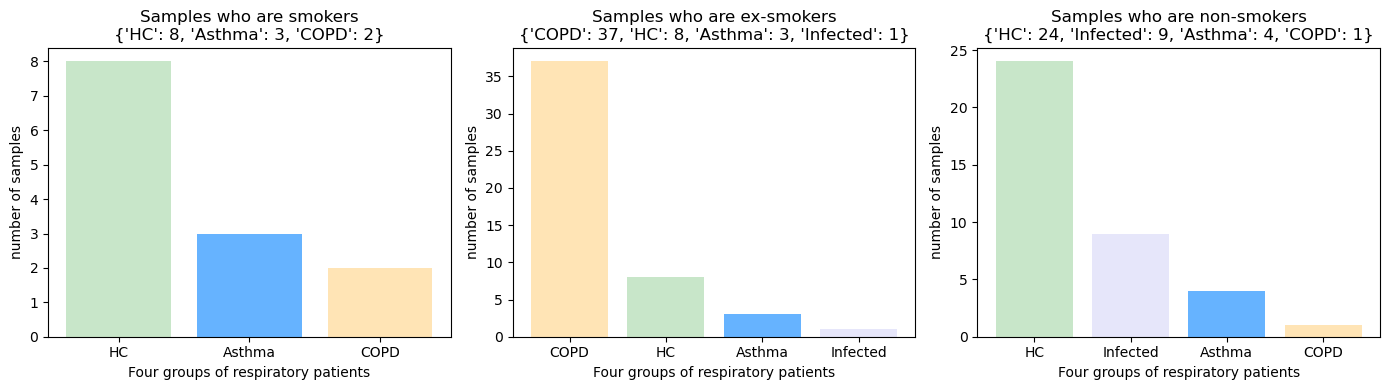

In [18]:
smok_sal = salivaco[salivaco['Smoking'] == 3]  #---filtering smokers
ex_smok_sal = salivaco[salivaco['Smoking'] == 2]
non_smok_sal = salivaco[salivaco['Smoking'] == 1]

smok_sal_tar = smok_sal['Diagnosis'].value_counts()  #---calculating target class
ex_smok_sal_tar = ex_smok_sal['Diagnosis'].value_counts()
non_smok_sal_tar = non_smok_sal['Diagnosis'].value_counts()

smoke_dist = salivaco['Smoking'].value_counts()

print("samples of respiratory patients who are smokers:")
print(smok_sal_tar)
print("\nsamples of respiratory patients who are ex-smokers:")
print(ex_smok_sal_tar)
print("\nsamples of respiratory patients who are non-smokers:")
print(non_smok_sal_tar)
print("\nSmoking distribution:")
print(smoke_dist)

salfig, axsal = pltcopd.subplots(1, 3, figsize=(14, 4))

#---plotting piecharts
axsal[0].bar(smok_sal_tar.index.astype(str), smok_sal_tar.values, color=['#C8E6C9', '#66B3FF', '#FFE4B5', '#E6E6FA'])
axsal[0].set_title(f'Samples who are smokers\n{smok_sal_tar.to_dict()}')
axsal[0].set_xlabel('Four groups of respiratory patients')
axsal[0].set_ylabel('number of samples')

axsal[1].bar(ex_smok_sal_tar.index.astype(str), ex_smok_sal_tar.values, color=['#FFE4B5', '#C8E6C9', '#66B3FF', '#E6E6FA'])
axsal[1].set_title(f'Samples who are ex-smokers\n{ex_smok_sal_tar.to_dict()}')
axsal[1].set_xlabel('Four groups of respiratory patients')
axsal[1].set_ylabel('number of samples')

axsal[2].bar(non_smok_sal_tar.index.astype(str), non_smok_sal_tar.values, color=['#C8E6C9', '#E6E6FA', '#66B3FF', '#FFE4B5'])
axsal[2].set_title(f'Samples who are non-smokers\n{non_smok_sal_tar.to_dict()}')
axsal[2].set_xlabel('Four groups of respiratory patients')
axsal[2].set_ylabel('number of samples')
salfig.tight_layout()
salfig.show()

smoker (3); ex-smoker (2); non-smoker (1)

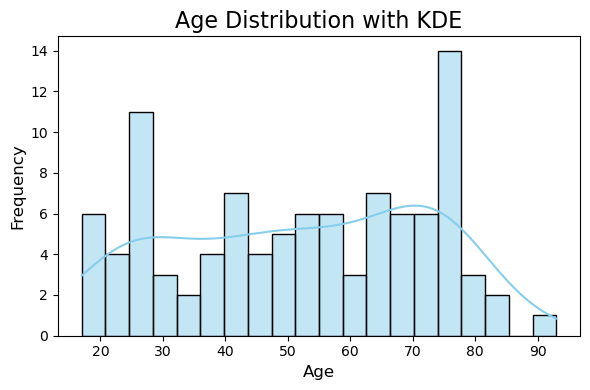

In [19]:
pltcopd.figure(figsize=(6, 4))
snscopd.histplot(salivaco['Age'], kde=True, bins=20, color='#87CEEB', edgecolor='black')

pltcopd.title('Age Distribution with KDE', fontsize=16)
pltcopd.xlabel('Age', fontsize=12)
pltcopd.ylabel('Frequency', fontsize=12)
pltcopd.tight_layout()
pltcopd.show()

In [20]:
from sklearn.preprocessing import LabelEncoder as saliva_label

salcop_encod = saliva_label()
salivaco['Diagnosis'] = salcop_encod.fit_transform(salivaco['Diagnosis'])
salivaco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 375
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Diagnosis               100 non-null    int64  
 1   Imaginary Part (Min Δ)  100 non-null    float64
 2   Imaginary Part (Avg Δ)  100 non-null    float64
 3   Real Part (Min Δ)       100 non-null    float64
 4   Real Part (Avg Δ)       100 non-null    float64
 5   Gender                  100 non-null    int64  
 6   Age                     100 non-null    int64  
 7   Smoking                 100 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 7.0 KB


In [21]:
salivaco['Diagnosis'].value_counts()

Diagnosis
1    40
2    40
0    10
3    10
Name: count, dtype: int64

In [22]:
salivaco.to_csv('Exasens_final.csv', index=False)